# Data in Motion Weekly Data Analysis Challenge
## Week 1: Chipotle Sales Analysis 

Link to dataset: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

Challenge Questions:
1. Which was the most-ordered item?
2. For the most-ordered item, how many items were ordered?
3. What was the most ordered item in the choice_description column?
4. How many items were ordered in total?
5. Turn the item price into a float
6. How much was the revenue for the period in the dataset?
7. How many orders were made in the period?
8. What is the average revenue amount per order?
9. How many different items are sold?

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
cmap = 'blues'

In [2]:
# read in .tsv file as .csv

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [3]:
# view head of data

chipo.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### 1. Which was the most-ordered item?

In [4]:
most_ordered = chipo['item_name']\
               .value_counts()\
               .reset_index()\
               .copy()\
               .head()

most_ordered.columns=['item_name', 'orders']

most_ordered.head()

,item_name,orders
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


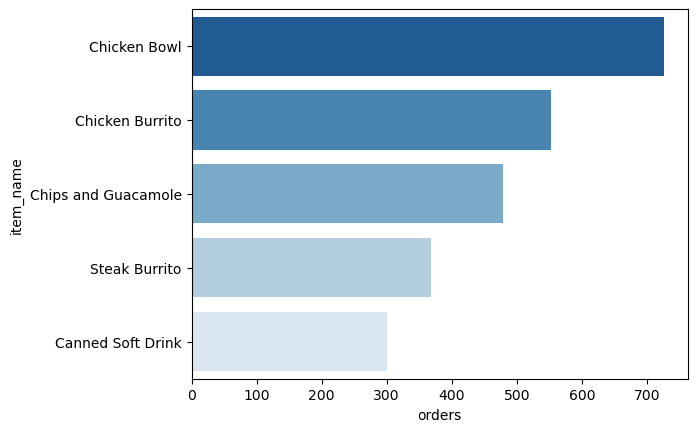

In [5]:
sns.barplot(x='orders',
            y='item_name',
            data=most_ordered,
            orient = 'h',
            palette='Blues_r')

plt.show()

**Chicken bowls are the most ordered item, appearing in 726 orders.**

### 2. For the most-ordered item, how many items were ordered?

In [6]:
chipo.groupby(by='item_name')['quantity']\
               .agg(sum)\
               .sort_values(ascending=False)\
               .reset_index()\
               .head(1)

,item_name,quantity
0,Chicken Bowl,761


**761 chicken bowls were ordered.**

### 3. What was the most ordered item in the choice_description column?

In [7]:
most_ordered = chipo['choice_description']\
               .value_counts()\
               .reset_index()\
               .copy()\
               .head()

most_ordered.columns=['choice_description', 'orders']

most_ordered.head()

,choice_description,orders
0,[Diet Coke],134
1,[Coke],123
2,[Sprite],77
3,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",42
4,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",40


**Diet Coke is the most ordered item in the choice_description, appearing in 134 orders.**

### 4. How many items were ordered in total?

In [19]:
total_items = chipo['quantity'].sum()
total_items

4972

**There were 4,972 items ordered in total.**

### 5. Turn the item price into a float

In [9]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
# view dtypes, item_price is a string
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [11]:
# strip dollar sign
chipo['item_price'] = chipo['item_price']\
                      .apply(lambda x: x.strip('$'))

# convert to float data type
chipo['item_price'] = chipo['item_price'].astype(float)

# view head of data, item_price no longer contains the dollar sign
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [12]:
# view data types again, item price now shows as a float
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

### 6. How much was the revenue for the period in the dataset?

In [16]:
revenue = chipo['item_price'].sum()
revenue

34500.16

**There was a revenue of $34,500.16.**

### 7. How many orders were made in the period?

In [17]:
total_orders = chipo['order_id'].value_counts().sum()
total_orders

4622

**There were 4,622 orders made in the time period.**

### 8. What is the average revenue amount per order?

In [20]:
avg_revenue = revenue/total_orders
avg_revenue

7.464335785374297

**The average revenue amount per order is $7.46.**

### 9. How many different items are sold?

In [26]:
total_items = chipo['item_name'].nunique()
total_items

50

**There are 50 different items sold.**